<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-data-and-pre-processing" data-toc-modified-id="Loading-data-and-pre-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading data and pre-processing</a></span></li><li><span><a href="#Functions-for-calculating-and-analyzing-LTV,-ROI,-retention-and-conversion." data-toc-modified-id="Functions-for-calculating-and-analyzing-LTV,-ROI,-retention-and-conversion.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions for calculating and analyzing LTV, ROI, retention and conversion.</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#Marketing" data-toc-modified-id="Marketing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Marketing</a></span></li><li><span><a href="#Ad-ROI-Estimation" data-toc-modified-id="Ad-ROI-Estimation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ad ROI Estimation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Business performance analysis of an entertainment mobile app

We need to perform business analysis of an entertainment mobile application.

Despite huge investments in advertising the company has been losing money for the past few months. Our task is to understand the reasons and help the company to become profitable.

There is data about users attracted from May 1 to October 27, 2019:

* server log with data about their visits,
* unloading their purchases for this period,
* advertising expenses.


<div style="border:solid green 2px; padding: 20px">
    
**PROJECT PLAN**
    
**Our task** - analyze the business performance of the application, create a user profile, find out the success of attracting customers and what factors prevent us from achieving high profitability.
    
**Project implementation plan:**
    
1. Download the available data and study the general information. Data pre-processing.
    
    
2. Set functions for calculation and analysis:
    
    - to create user profiles;
    
    - for retention and conversion calculation;
    
    - for calculating LTV;
    
    - to smooth data when plotting;
    
    - for plotting retention and conversion charts;
    
    - for LTV and ROI visualizing.
    
    
3. Conduct an exploratory analysis:
    
    - create user profiles;
    
    - find out from which countries users come to the application and which country has the most paying users;
    
    - find out what devices customers use and what devices paying users prefer;
    
    - study advertising sources of attraction and determine the channels from which the most paying users came.
    
    
4. Perform marketing analysis of indicators:
    
    - calculate the total cost of marketing and find out how the costs are distributed by advertising sources;
    
    - visualize the dynamics of changes in costs over time;
    
    - find out how much it cost on average to acquire one user (CAC) from each source.
    
    
5. Conduct an advertising ROI assessment:
    
    - using LTV, ROI and CAC charts, perform an advertising ROI analysis;
    
    - find out which devices, countries and advertising channels can have a negative impact on advertising ROI and the causes of ROI problems.
    
    
6. Conclusion.

### Loading data and pre-processing

We will examine the data and perform pre-processing. Let's make sure that the data types in all columns correspond to the values stored in them. We need to pay attention to the columns with the date and time.

In [2]:
# libraries import
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [3]:
try:
    visits, orders, ad_costs = (
        pd.read_csv('/Users/bulchuk/Documents/Data Analyst/Business Intelligence/visits_info_short.csv'), 
        # session log
        pd.read_csv('/Users/bulchuk/Documents/Data Analyst/Business Intelligence/orders_info_short.csv'), 
        # orders log
        pd.read_csv('/Users/bulchuk/Documents/Data Analyst/Business Intelligence/costs_info_short.csv') 
        # ad spend
    )
except OSError as error:
    print(error)

In [4]:
# display the first 5 lines of all dataframes
display(visits.head())
display(orders.head())
ad_costs.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<div style="border:solid green 2px; padding: 20px">

We have three datasets at our disposal.
    
The file `visits_info_short.csv` stores a server log with information about site visits, `orders_info_short.csv` — information about orders, and `costs_info_short.csv` — advertising spending information.

Structure of `visits_info_short.csv`:
* 		`User Id` — unique user id,
* 		`Region` — user country,
* 		`Device` — user device type,
* 		`Channel` — transition channel identifier,
* 		`Session Start` — session start date and time,
* 		`Session End` — session end date and time.

Structure of `orders_info_short.csv`:
* 		`User Id` — unique user id,
* 		`Event Dt` — order date and time,
* 		`Revenue` — order cost.

Structure of `costs_info_short.csv`:
* 		`dt` — date of the campaign,
* 		`Channel` — advertising channel ID,
* 		`costs` — ad spend.
    

In [5]:
# bring the names of the columns to the general order, i.e. to lowercase and eliminate spaces in the names
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
ad_costs.columns = ad_costs.columns.str.lower()
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


<div style="border:solid green 2px; padding: 20px">
    
There are no gaps in all dataframes. Check for obvious duplicates.

In [8]:
visits.duplicated().sum()

0

In [9]:
orders.duplicated().sum()

0

In [10]:
ad_costs.duplicated().sum()

0

In [11]:
# check the unique column values
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [12]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [13]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

<div style="border:solid green 2px; padding: 20px">

The data contains information about customers in the US, UK, France, and Germany.
    
Customers use 4 kinds of devices: iPhone, Mac, Android and PC.
    
There are 11 customer acquisition channels: Organic, TipTop, RocketSuperAds, YRabbit, FaceBoom, MediaTornado, AdNonSense, LeapBob, WahooNetBanner, OppleCreativeMedia and lambdaMediaAds.

In [14]:
# transform time data
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

In [15]:
# our data should have data from May 1 to October 27, 2019, but check it out
visits_min = visits['session_start'].min()
print('Minimum session start date:', visits_min)
visits_max = visits['session_start'].max()
print('Maximum session start date:', visits_max)
orders_min = orders['event_dt'].min()
print('Minimum order date', orders_min)
orders_max = orders['event_dt'].max()
print('Maximum order date', orders_max)
ads_min = ad_costs['dt'].min()
print('Minimum date of the ads campaign', ads_min)
ads_max = ad_costs['dt'].max()
print('Maximum date of the ads campaign', ads_max)

Minimum session start date: 2019-05-01 00:00:41
Maximum session start date: 2019-10-31 23:59:23
Minimum order date 2019-05-01 00:28:11
Maximum order date 2019-10-31 23:56:56
Minimum date of the ads campaign 2019-05-01
Maximum date of the ads campaign 2019-10-27


In [16]:
# check if there are negative values in the costs column
negative_costs = ad_costs['costs'] <= 0
negative_costs.unique()

array([False])

In [17]:
# check if there are negative values in the column with revenue
negative_revenue = orders['revenue'] <= 0
negative_revenue.unique()

array([False])

<div style="border:solid green 2px; padding: 20px">
    
We checked the original data: no gaps or duplicates were found in any of the dataframes.
    
Additionally we changed the names of the columns to bring them to a common form, and also brought the temporary columns to the date format we needed for further more convenient analysis.
    
Zero and negative values were not found in the columns with the amounts of costs and orders, everything is in order with the data.
    
Despite the fact that order dates were found later than the period we needed, we do not now cut the data, since a function for creating user profiles will be introduced later, which will just leave for us only the required amount of data.

### Functions for calculating and analyzing LTV, ROI, retention and conversion.

These are the functions for calculating metric values:

- `get_profiles()` — for user profile creation,
- `get_retention()` — for calculation Retention Rate,
- `get_conversion()` — to calculate conversion,
- `get_ltv()` — for calculating LTV.

As well as functions for charts creation:

- `filter_data()` — for data smoothing,
- `plot_retention()` — to create a chart of the Retention Rate,
- `plot_conversion()` — to create a conversion chart,
- `plot_ltv_roi` — for LTV and ROI visualizing.

In [18]:
# function to create user profiles

def get_profiles(visits, orders, ad_costs):

    # find the parameters of the first visits
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis we determine the date of the first visit
    # and the first day of the month in which this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # add a feature for paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # counting the number of unique users
    # with the same channel and date of acquisition
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # combine ads costs and the number of acquised users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # divide ads costs by the number of acquised users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # add acquisition cost to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of organic user acquisition is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [19]:
# function to calculate retention

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # add the payer column to the passed dimensions list
    dimensions = ['payer'] + dimensions

    # we exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collecting "raw" data to calculate retention
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function for grouping a data according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get hold table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # get a table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time

In [20]:
# function for calculating conversion

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determine the date and time of the first purchase for each user
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # add purchase data to profiles
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # function for grouping a table according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each "cell" in the row by the size of the cohort
        # and get conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamics table, remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time

In [21]:
# function for LTV and ROI calculating 

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # add purchase data to profiles
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate the user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # grouping function according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        # we build a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # find the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # combine cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculate LTV: divide each “cell” in the row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # exclude all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # collect a dataframe with user data and CAC values,
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculate average CAC according to the parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # remove rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restoring cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # add CAC to ROI table
        roi['cac'] = cac['cac']

        # in the final table we leave the sizes of cohorts, CAC
        # and ROI in lifetimes that do not exceed the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return LTV and ROI tables
        return result, roi

    # get LTV и ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # we get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # table of ROI dynamics
    )

In [22]:
# frame smoothing function

def filter_data(df, window):
    # for each column apply a consecutive mean
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [23]:
# hold visualization function

def plot_retention(retention, retention_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and first day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # leave only the necessary lifetime in the table of dynamics 
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if there is only payer in the indexes of the hold table,
    # add the second feature - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # there are two columns and two rows, four cells in the table of graphs
    # in the first we build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # the dynamics of retention of paying will be in the second cell 
    # vertical axis if from the chart from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    # get column names for pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filtering data and create a chart
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title(
        'Dynamics of retention of paying users on the {}-th day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [24]:
# function to visualize the conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # leave only the necessary lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # the first chart is conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # the second graph is the dynamics of conversion
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # all index columns except date will become pivot table columns
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('Dynamics of user conversion on the {}-th day'.format(horizon))

    plt.tight_layout()
    plt.show()

In [25]:
# function to visualize LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    # exclude cohort sizes from the LTV table
    ltv = ltv.drop(columns=['cohort_size'])
    # leave only the desired lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # the acquisition cost will be written in a separate frame
    cac_history = roi_history[['cac']]

    # from the ROI table we exclude the sizes of cohorts and CAC
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the ROI dynamics table, we leave only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # the first chart is LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # the second chart is LTV dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('User LTV dynamics on the {} day'.format(horizon))

    # the third chart is the dynamics of CAC
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title('User Acquisition Cost Dynamics')

    # the fourth chart is ROI curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback rate')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # the fifth chart is ROI dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback rate')
    plt.xlabel('Acquisition date')
    plt.title('ROI dynamics of users on the {}-th day'.format(horizon))

    plt.tight_layout()
    plt.show()

<div style="border:solid green 2px; padding: 20px">

All the necessary functions have been set, we can proceed to the calculation and analysis.


### Exploratory data analysis

- Create user profiles. Determine the minimum and maximum dates for users acquisition.

- Find out from which countries users come to the application and which country has the most paying users. Create a table reflecting the number of users and the share of paying from each country.

- Find out what devices customers use and what devices paying users prefer. Create a table showing the number of users and share of paying for each device.

- We will study acquisition channels and determine the channels from which the most paying users came. Create a table that reflects the number of users and the share of paying for each acquisition channel.


<div style="border:solid green 2px; padding: 20px">

Get user profiles.

To do this we call the get_profiles() function passing it data about visits, purchases, and ad spends.

In [26]:
# get users profiles
profiles = get_profiles(visits, orders, ad_costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [27]:
# determine the minimum and maximum date for users acquisition
min_date = profiles['dt'].min()
display(min_date)
max_date = profiles['dt'].max()
max_date

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

In [28]:
# We need to set the moment and horizon of data analysis.
# Let's imagine that today is November 1, 2019, 
# and the business plan states that users must be justified no later than two weeks after the acquisition.
observation_date = datetime(2019, 11, 1).date()  
horizon_days = 14  

<div style="border:solid green 2px; padding: 20px">
    
The minimum user acquisition date is May 1, 2019. The maximum date is October 27, 2019.
    
The moment of analysis is November 1, 2019.

Analysis horizon is 14 days.

In [29]:
# find out from which countries users come to the app and which country has the most paying users
users_region = (
    profiles.groupby('region')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'total_users'})
    .sort_values(by='total_users', ascending=False)
)

# add a column with paying users
users_region['total_payer'] = (
    profiles.query('payer == True')
    .groupby('region')
    .agg({'user_id': 'nunique'})
    .rename(columns={'total_payer': 'total_payer'})
)
users_region

,total_users,total_payer
region,,
United States,100002,6902
UK,17575,700
France,17450,663
Germany,14981,616


In [30]:
# create a table reflecting the number of users (total and paying) and the share of paying from each country
users_region['payer_share'] = (users_region['total_payer'] / users_region['total_users'] * 100).round(2)
users_region

,total_users,total_payer,payer_share
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


<div style="border:solid green 2px; padding: 20px">
    
Most of the audience that use the application is from the US - 100,000 thousand against about 17,500 from the UK and France. Even fewer users from Germany.

The number of paying users is more than 10 times less, if we count from the total number - only 7% of users from the USA belong to the paying category, from the UK and France no more than 4%, but from Germany a little more than 4%, despite the fact that the total number of users from this region is the least.
    
Earlier we learned that users prefer 4 types of devices - iPhone, Mac, Android and PC.
Let's see which devices paying users prefer.

In [31]:
# find out how many clients out of the total number of users use a particular device
profile_devices = (
    profiles.groupby('device')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'total_users'})
    .sort_values(by='total_users', ascending=False)
)

# add a column with paying users
profile_devices['total_payer'] = (
    profiles.query('payer == True')
    .groupby('device')
    .agg({'user_id': 'nunique'})
    .rename(columns={'total_payer': 'total_payer'})
)

# create a table reflecting the number of users and the share of paying for each device
profile_devices['payer_share'] = (profile_devices['total_payer'] / profile_devices['total_users'] * 100).round(2)
profile_devices

,total_users,total_payer,payer_share
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05
Mac,30042,1912,6.36


<div style="border:solid green 2px; padding: 20px">
    
Most of the total number of users prefer the iPhone: almost 55 thousand customers.

A little more than 35 thousand users - Android, and 30 thousand users each who use the application through a PC or Mac.
    
At the same time the share of paying customers is almost equal. Paying users who prefer Mac and Iphone are knocked out ahead - in each of the categories of devices there are more than 6% of paying customers. 
    
Slightly less than 6% for Android users. And the least paying segment of PC users is 5%.
    
Next, we will study the advertising sources of attraction and determine the channels from which the most paying users came.

In [32]:
profile_channel = (
    profiles.groupby('channel')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'total_users'})
)

profile_channel['total_payer'] = (
    profiles.query('payer == True')
    .groupby('channel')
    .agg({'user_id': 'nunique'})
    .rename(columns={'total_payer': 'total_payer'})
)

profile_channel['payer_share'] = (profile_channel['total_payer'] / profile_channel['total_users'] * 100).round(2)
profile_channel.sort_values(by='payer_share', ascending=False)

,total_users,total_payer,payer_share
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


<div style="border:solid green 2px; padding: 20px">
    
In general we can see that we get the largest number of users from organic, which is a good indicator.
However, this category has the least paying users.
    
The first three acquisition channels are FaceBoom, AdNonSense, lambdaMediaAds (through each of them we get more than 10% of paying users).
    
Slightly less (9.6% of users) we receive through the TipTop channel.
    
Half of the paid acquisition channels, which close the top ten channels, bring a total of just over 18%.
    
We looked at baseline user-to-buyer conversions by region, device, and acquisition channel, and identified the main market. 
    
Most of the users come from the USA, and they convert better than others. At the same time, most of the users come from mobile devices, this is also worth noting.
    
Also we can say that Mac users have the highest conversion, followed by iPhone users, i.e. we can say that in general, Apple users have the best conversion to buyers. Perhaps there are advantages to ApplePay.

### Marketing

- Calculate the total cost of marketing.
- Let's find out how spending is distributed among advertising channels, that is, how much money was spent on each channel.
- Create a visualization of the dynamics of changes in expenses over time (by weeks and months) for each channel.
- Let's find out how much it cost on average to attract one user (CAC) from each channel. Use user profiles.

In [33]:
# Calculate the total cost of marketing
total_cost = ad_costs['costs'].sum()
total_cost.round()

105497.0

In [34]:
# find out how much money is spent on each channel
costs_per_channel = ad_costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
costs_per_channel

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


<div style="border:solid green 2px; padding: 20px">

Most of the funds are spent on paying for advertising through the TipTop and FaceBoom channels: almost 55 and 33 thousand, respectively.

It is interesting that TipTop, meanwhile, is not among the top three in attracting paying users, and FaceBoom rather fully pays for the costs, but we will analyze this later.
    
The AdNonSense and lambdaMediaAds channels spend about 4 and 1.5 thousand, respectively, which is several times less than TipTop and FaceBoom, and these channels are among the top three in attracting the paying segment.

In [35]:
# change the date format in the ad_costs table, and display the week number and month number in additional columns
ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
ad_costs['week'] = ad_costs['dt'].dt.isocalendar().week
ad_costs['month'] = ad_costs['dt'].dt.month
# output the first 5 rows of the resulting table
ad_costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


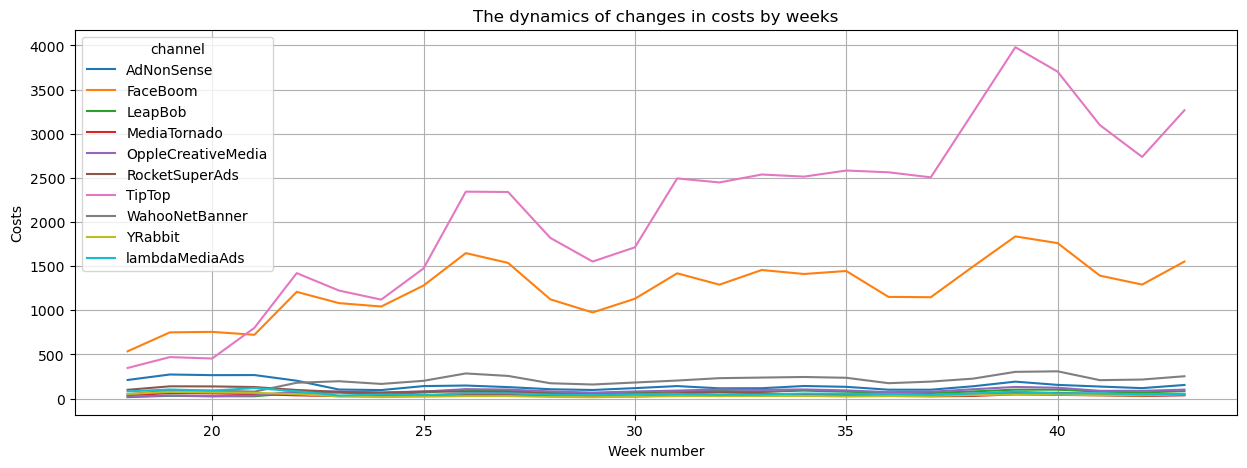

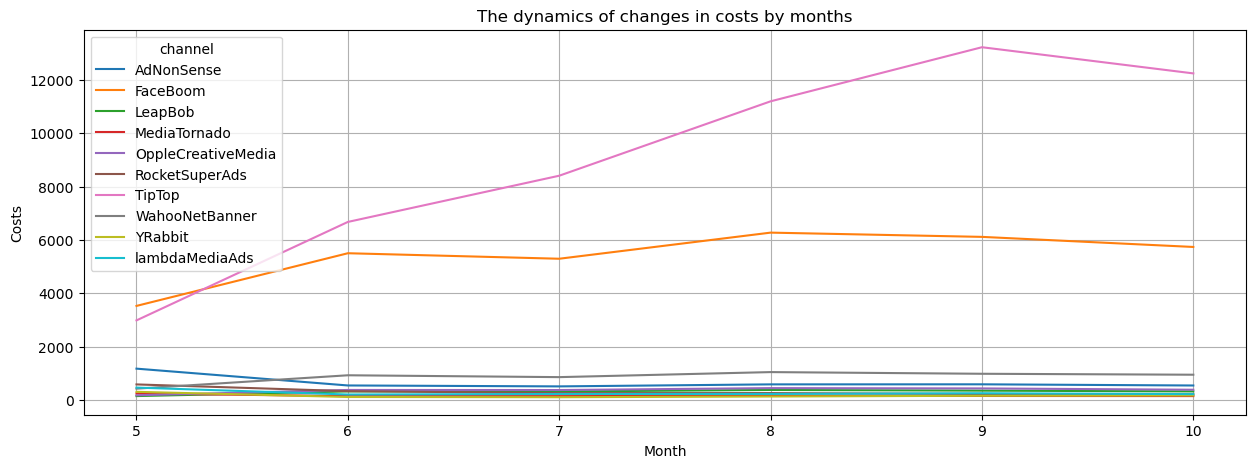

In [36]:
# create a visualization of the dynamics of changes in costs over time (by weeks and months) for each channel
ad_costs_by_week = ad_costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
)
ad_costs_by_week.plot(grid=True, figsize=(15, 5))
plt.title('The dynamics of changes in costs by weeks')
plt.ylabel('Costs')
plt.xlabel('Week number')

ad_costs_by_month = ad_costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
)
ad_costs_by_month.plot(grid=True, figsize=(15, 5))
plt.title('The dynamics of changes in costs by months')
plt.ylabel('Costs')
plt.xlabel('Month')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
Spending on TipTop and FaceBoom acquisition channels is growing both weekly and monthly. Their growth, in general, can be called symmetrical. The cost curve for the TipTop channel is higher on the graph due to the large amount allocated to it.
    
Spending on the TipTop channel peaked in September. Probably some kind of promotional campaign was planned. In the same September, we do not observe an increase in the cost of the FaceBoom channel.
    
All the remaining 8 channels are not distinguished by the amount of costs for them, and do not have noticeable peaks in the growth or decline in costs.

In [37]:
# find out how much it cost on average to attract one user (CAC) from each channel
cac_mean_per_channel = (
    profiles.groupby('channel') # we will use user profiles
    .agg({'acquisition_cost': 'mean'})
    .sort_values('acquisition_cost', ascending=False)
)
cac_mean_per_channel

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [42]:
# calculate the average CAC for all acquisition channels
cac_mean = round(profiles['acquisition_cost'].mean(), 2)
cac_mean

0.7

<div style="border:solid green 2px; padding: 20px">
    
It is understandable that CAC from the TipTop channel will be the highest - the majority of advertising costs go to this channel. The CAC of the TipTop channel is almost 4 times higher than the average of the total volume.
    
    
TipTop is the most expensive user acquisition channel, however the number and share of paying users coming from this source is not that high. This can be explained by TipTop's young audience and, accordingly, their not very high solvency.
    
In second place in terms of costs is the FaceBoom channel and in third is AdNonSense, which is noteworthy in that AdNonSense does not have such large costs (up to 4000), but almost 12% of paying users come. While no more than 10% comes from the TipTop channel.
    
6 acquisition channels showed less than the overall average CAC.

The cost of attracting "organic" users is zero, because they switched to the application on their own, and not through advertising. 

### Ad ROI Estimation

Using LTV, ROI and CAC charts we will analyze the payback of advertising. We believe that November 1, 2019 is on the calendar, and the business plan stipulates that users should be justified no later than two weeks after acquisition.

- analyze the payback of advertising using LTV and ROI charts, as well as charts of LTV, CAC and ROI dynamics.
- check the conversion of users and the dynamics of its change. We will do the same with user retention. We will build and study conversion and retention charts.
- analyze the payback of advertising by device. We will build LTV and ROI charts, as well as charts of LTV, CAC and ROI dynamics.
- analyze the payback of advertising by country. We will build LTV and ROI charts, as well as charts of LTV, CAC and ROI dynamics.
- analyze the payback of advertising with a breakdown by advertising channels. We will build LTV and ROI charts, as well as charts of LTV, CAC and ROI dynamics.
- We will answer such questions:
    - Does advertising aimed at attracting users in general pay off?
    - Which devices, countries, and advertising channels can negatively impact ad ROI?
    - What can cause payback problems?

We will write a conclusion, describe the possible causes of the detected problems and intermediate recommendations for the advertising department.

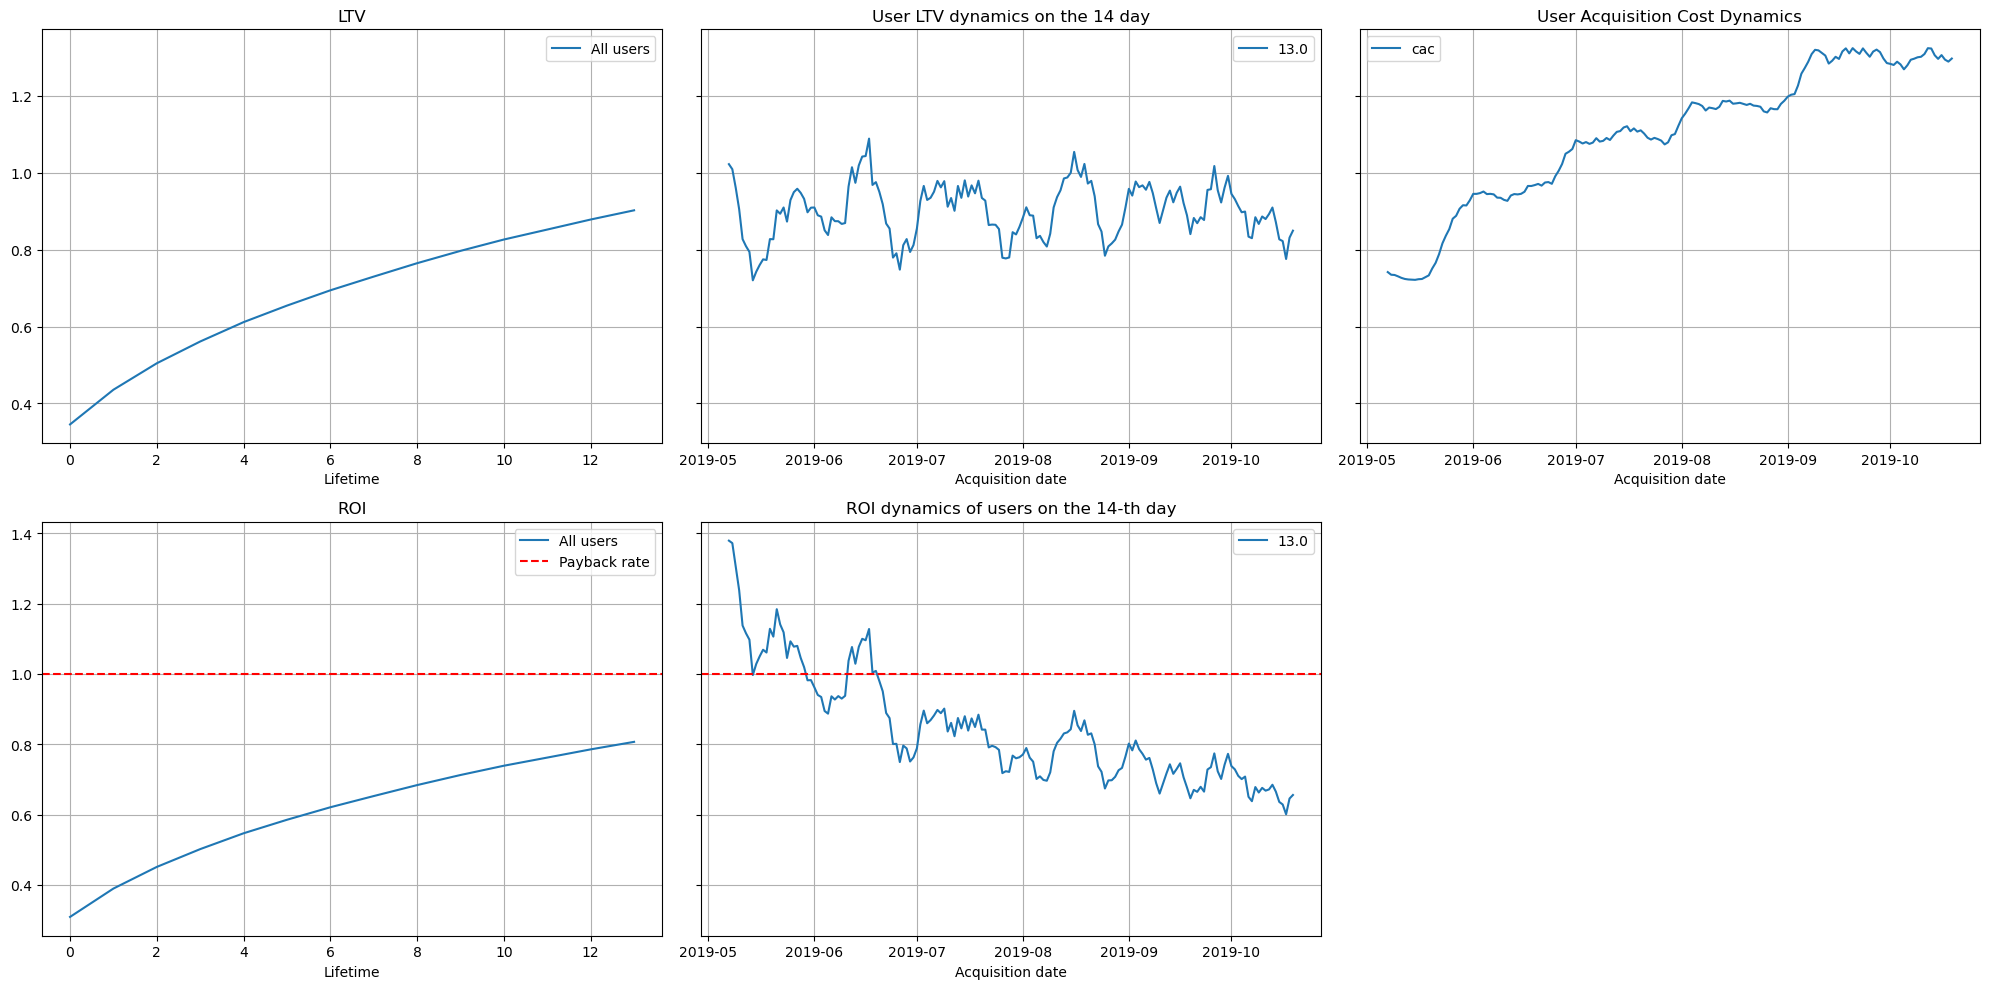

In [43]:
# for further more correct analysis we will leave users only from paid acquisition channels,
# because we don’t pay anything for organic users, and we need to study exactly the payback of advertising
profiles = profiles.query('channel != "organic"')
# calculate and visualize LTV and ROI by calling get_ltv() and plot_ltv_roi() functions
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div style="border:solid green 2px; padding: 20px">
    
The following conclusions can be drawn from the charts:
    
- advertising does not pay off, despite the fact that ROI tends to unity, but even at the end of the two-week period, it hardly reaches 80%.
    
- CAC level is not stable. It rises sharply in June, after which it only gradually rises. At the same time, ROI just at the same time begins to decline sharply. And despite the increase in the cost of customer acquisition, ROI continues to fall.
    
With a relatively stable dynamics of LTV the dynamics of CAC grows from May to the end of October. We observe this pattern in the dynamics of ROI, that with a strong increase in CAC, the dynamics of users' ROI equally falls.
    
To understand the reasons we will go through all the characteristics of users: device, country and advertising channel.

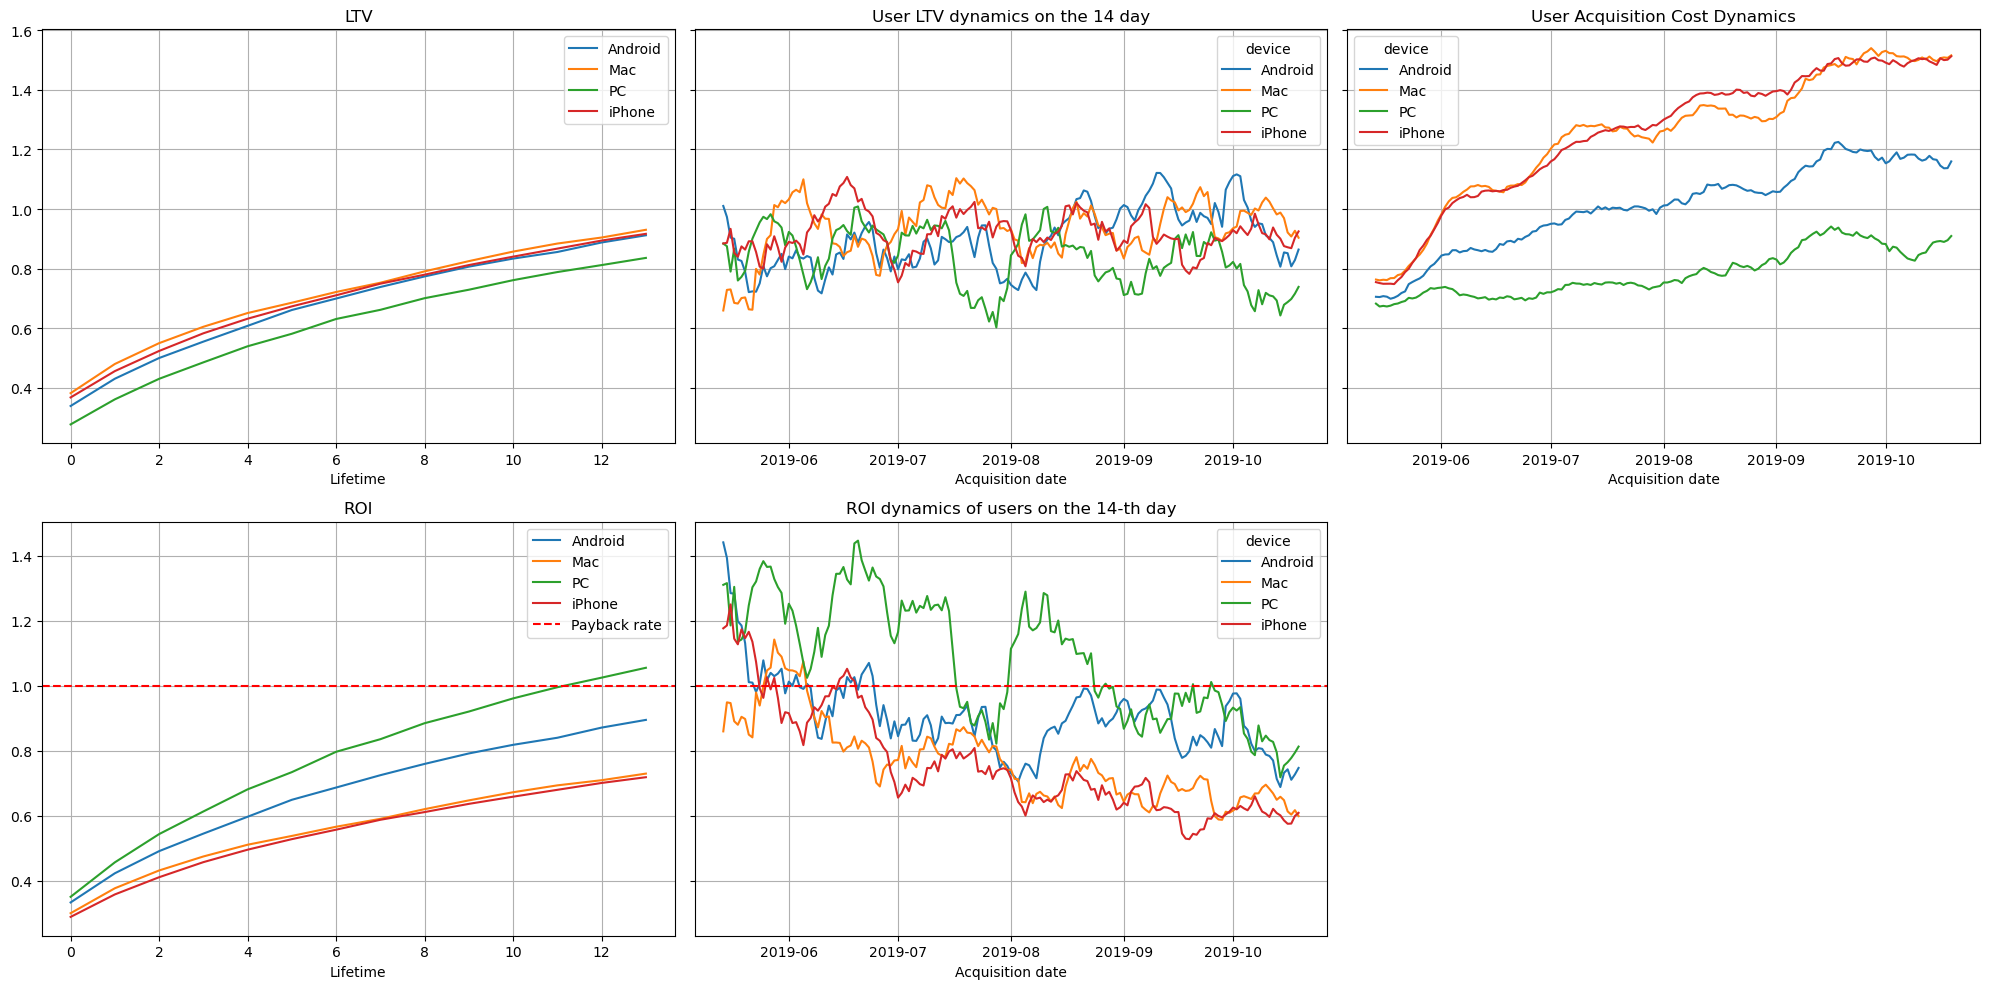

In [44]:
# ad ROI by device
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

<div style="border:solid green 2px; padding: 20px">
    
Сonclusions that can be drawn based on the devices preferred by users:
    
- there are payback problems for all devices except PC. This means that at least we don't have any technical issues affecting monetization. Advertising among Apple users does not pay off at all, reaches a level slightly above 70%;
    
- It is worth noting that, meanwhile, advertising costs for Apple users are 1.5-2 times higher than for Android and PC users. And the CAC growth of Apple users is much higher.
    
-  LTV is stable.
    


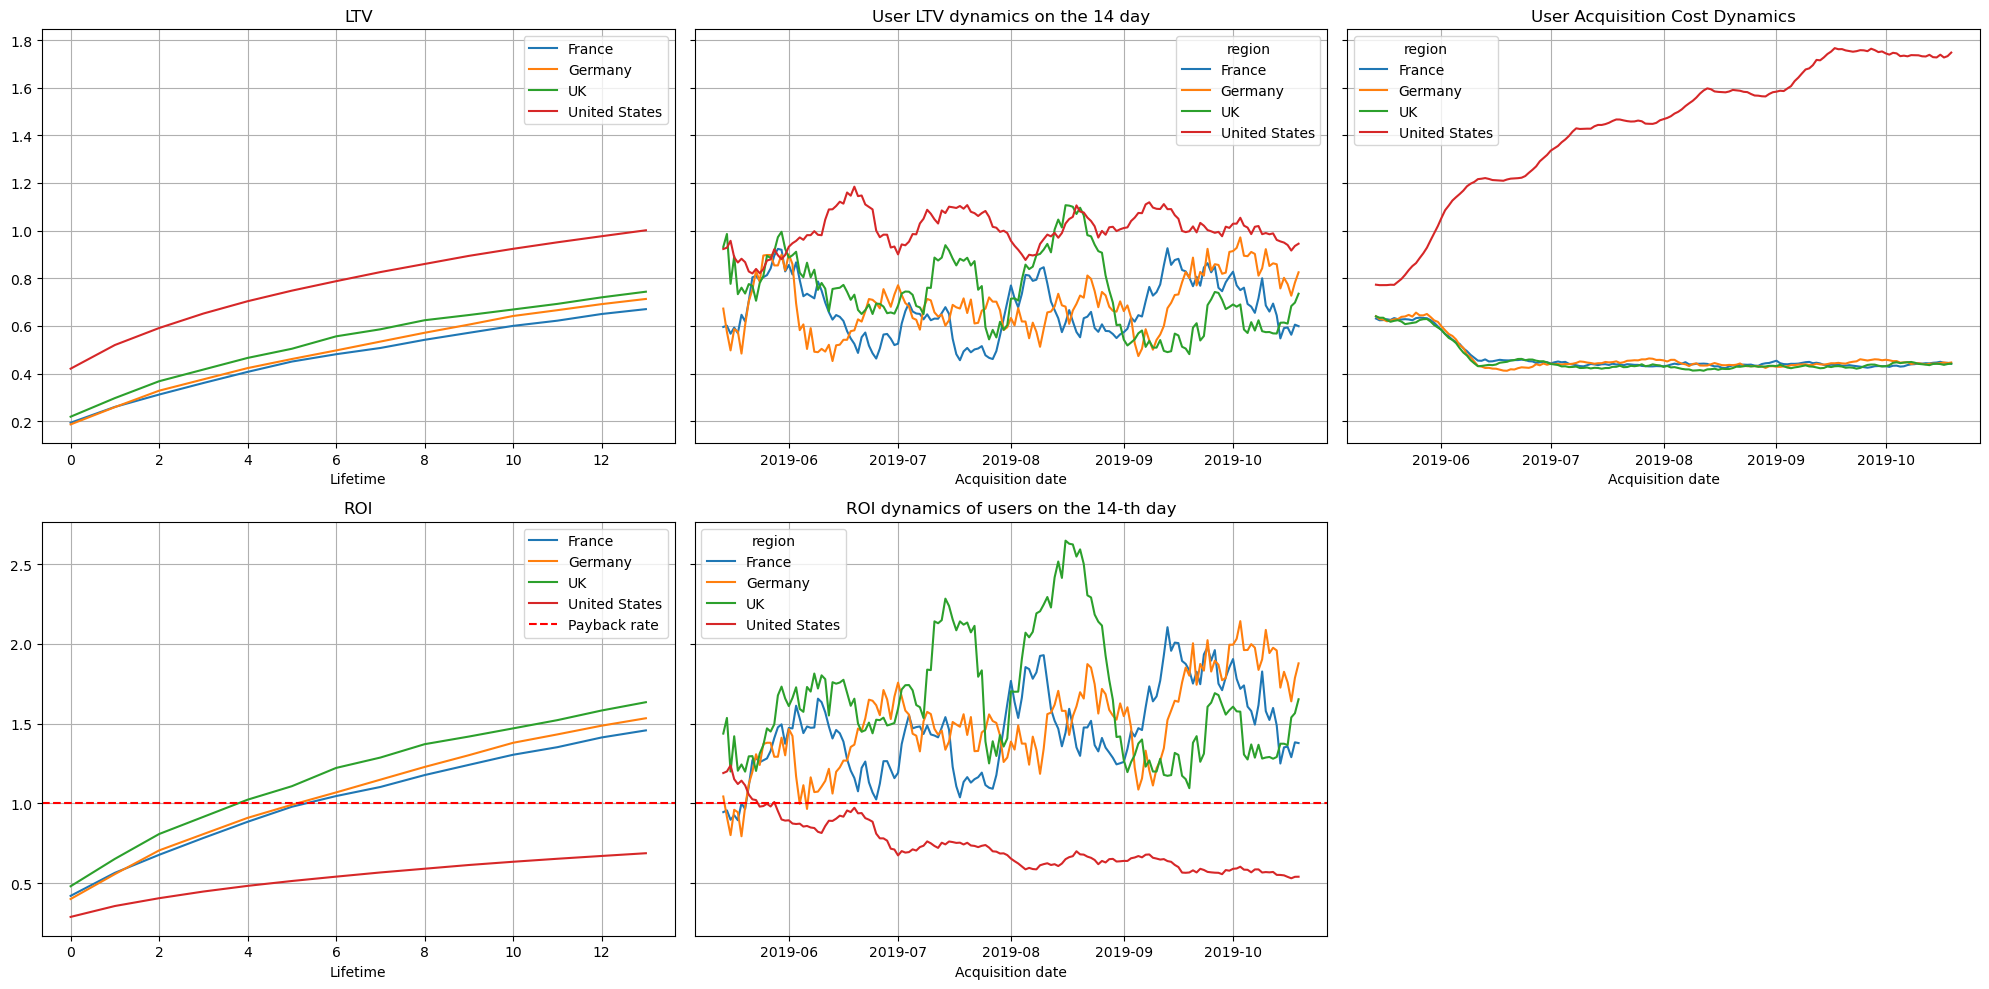

In [45]:
# ad ROI by country
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

<div style="border:solid green 2px; padding: 20px">
    
Let's look at the charts by country:
    
- advertising pays off only for users in France, Germany and the UK, but not for users from the USA which are the vast majority;
    
- at the same time we can observe that US users are the ones who receive significant advertising costs, while the CAC of customers from other regions is stable. We can note that the CAC of users in other regions is falling in a mirror relative to the growth of CAC of US users. Probably, in June all forces were directed to strengthening the American market.
    
- The LTV of customers from the US is the highest and is growing steadily, just like customers from other regions.
    
We need to check the advertising in the US in more detail, especially since this is our main market.

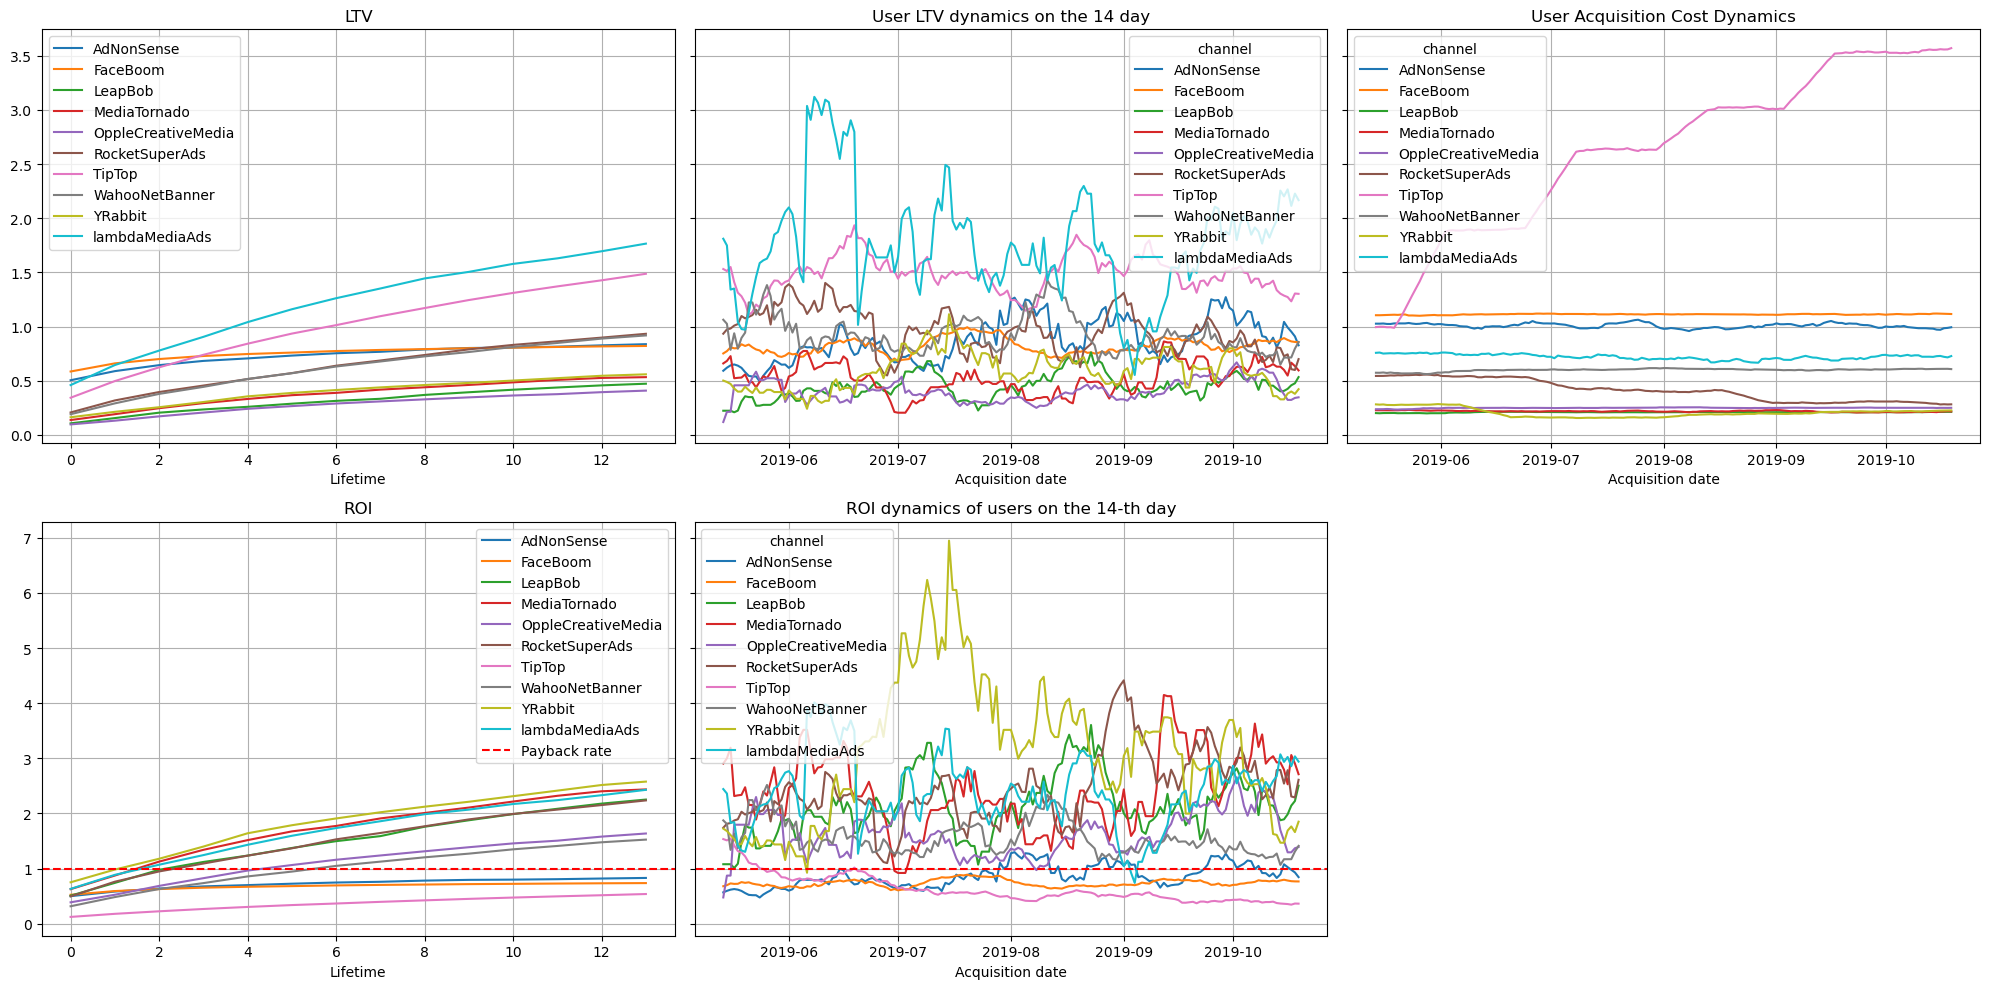

In [46]:
# ad ROI by channel
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

<div style="border:solid green 2px; padding: 20px">
    
There are problems with the TipTop channel, we see a significant increase in acquisition costs.
    
Let's look at the charts:
    
- TipTop is the channel that spends most of the advertising costs does not pay off, moreover, by the end of the 2-week period, the ROI of this channel barely exceeds 50%;
    
- two more channels from the leaders in attracting paid users are FaceBoom and AdNonSense; they also do not pay off, but their ROI is already closer to 90%;
    
- the CAC of almost all acquisition channels is stable, with the exception of TipTop, which shows periodic constant "step-by-step" growth in dynamics. It can be assumed that this channel was used just to attract users from the United States who prefer Apple devices..
    
- we would like to note a significant increase in the dynamics of the ROI of buyers from the YRabbit channel and, in general, their ROI is higher than the rest. It is possible that this acquisition channel is able to work with different user segments and run successful campaigns..
    
Next, let's look at conversion and user retention.

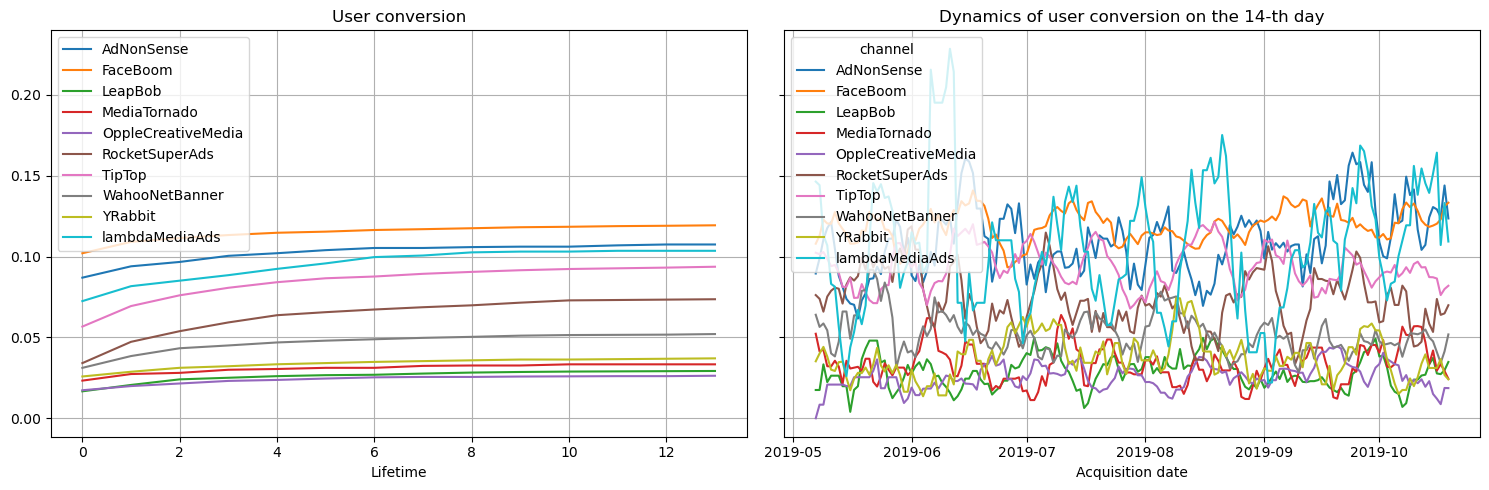

In [47]:
# calculate and visualize the conversion by acquisition channels
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

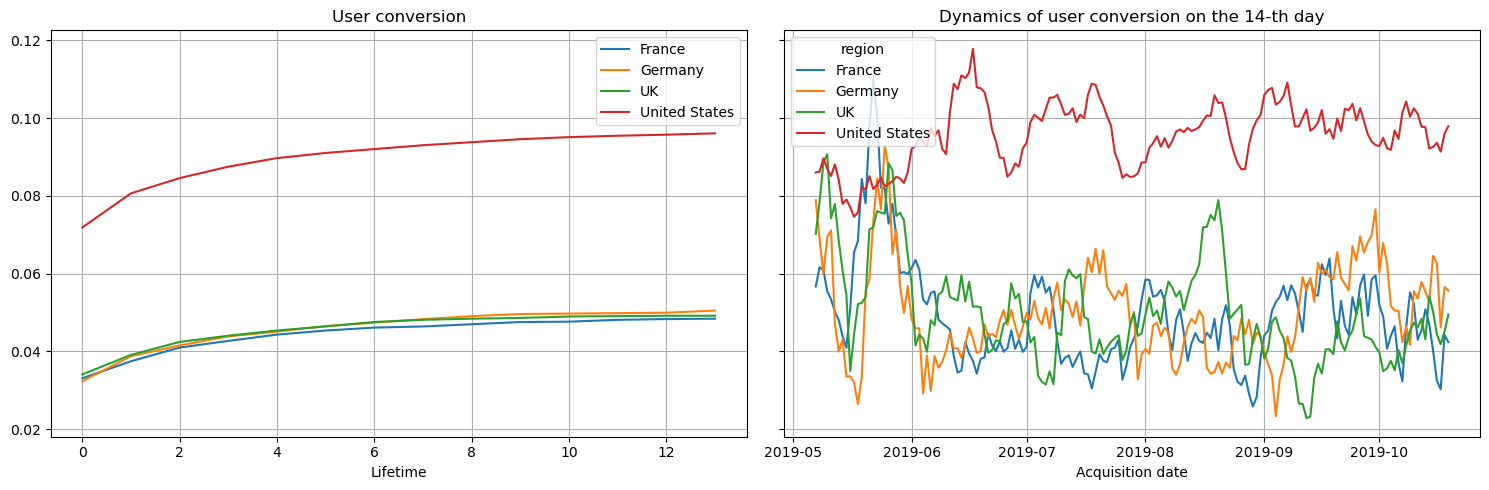

In [48]:
# check the conversion by country
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

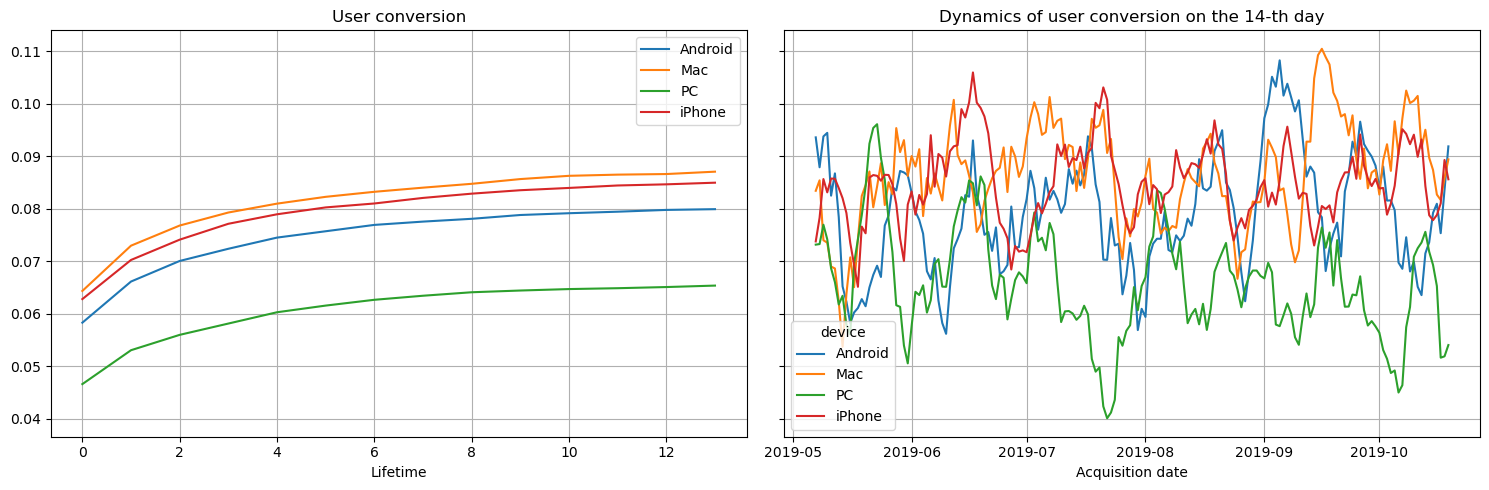

In [49]:
# check the conversion by device
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<div style="border:solid green 2px; padding: 20px">
    
Conversions generally increase slightly on the 2nd day of lifetime, but then remain stable across all acquisition channels, devices, and countries.
    
The highest conversions are shown by the channels FaceBoom, AdNonSense and lambdaMediaAds - just the top three in attracting the paying segment of users.
   
Users from the LeapBob and OppleCreativeMedia channels have the lowest conversion rates.
    
Users from the USA convert very well, their conversion is higher than that of users from other regions.
    
PC users have the lowest conversion by device; it is likely that the application is not in demand among this segment of customers.
    
Below we will check customer retention, also broken down by channel, country, and device.

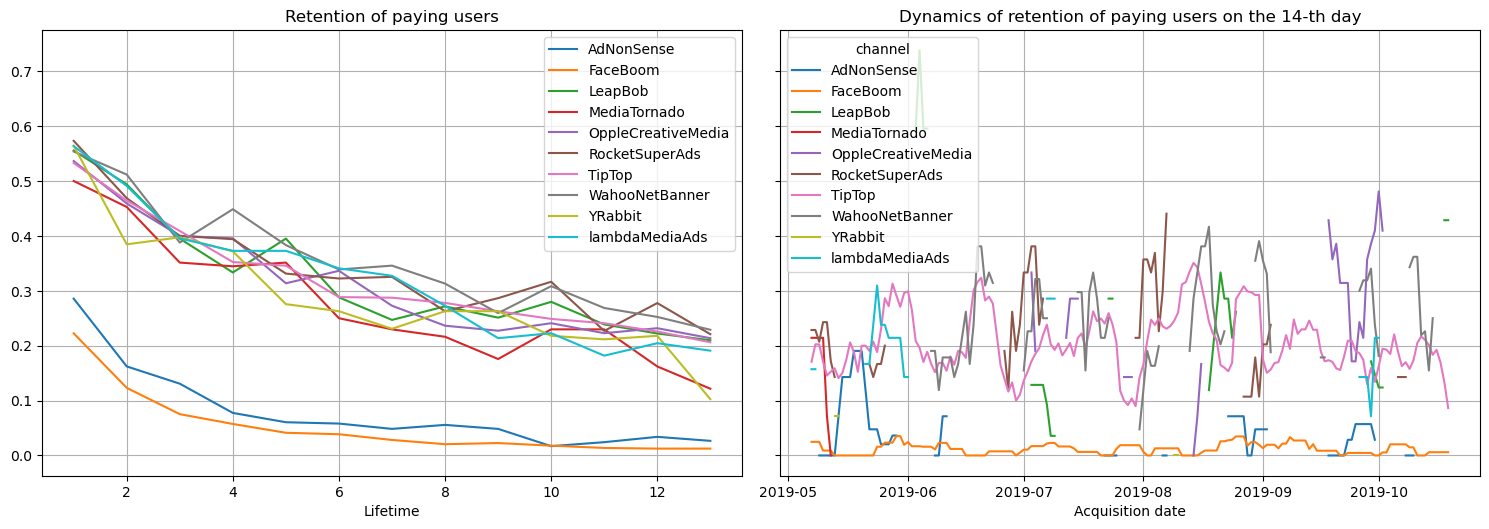

In [50]:
# check retention by channel
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

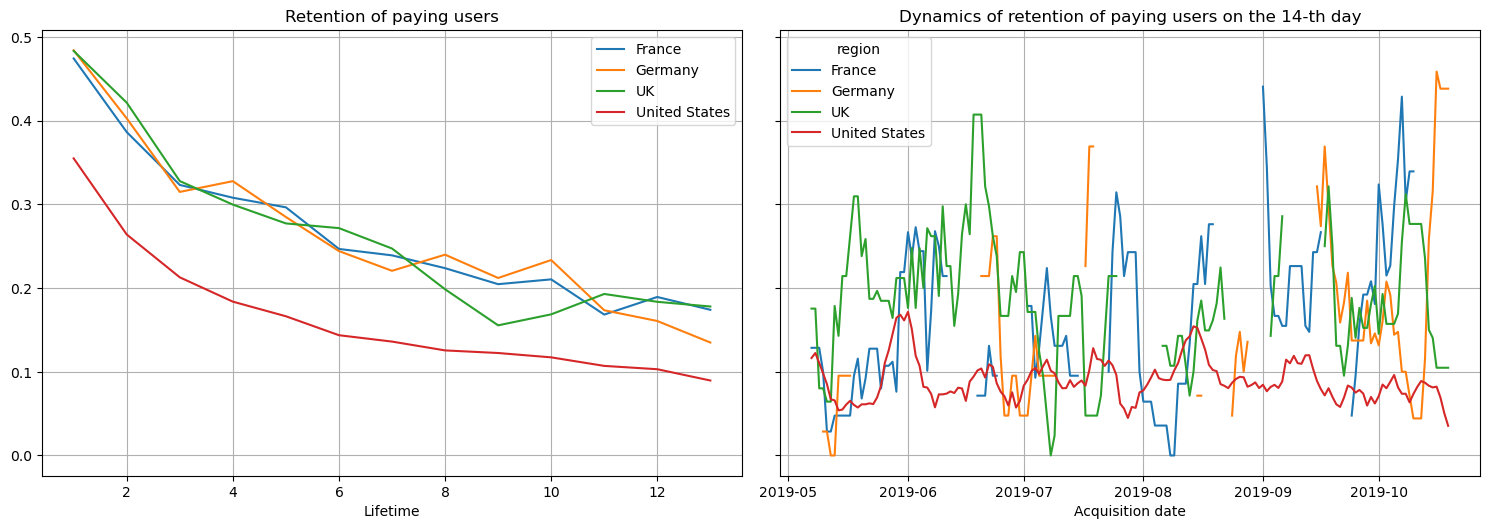

In [51]:
# retention by country
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

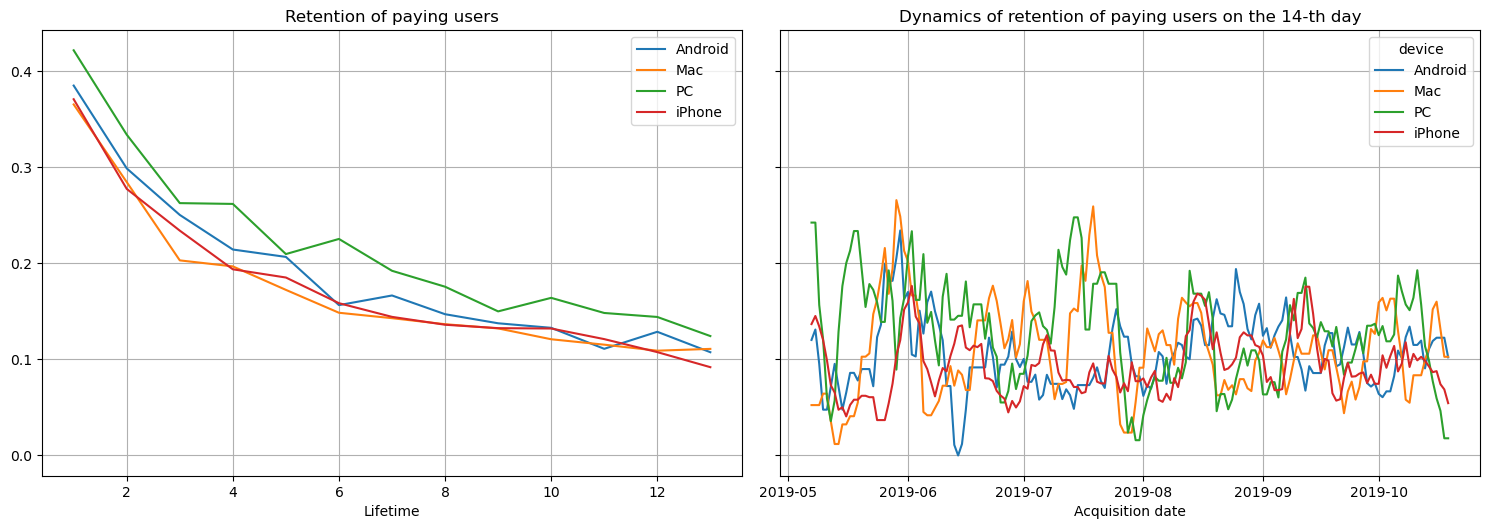

In [52]:
# check retention by device
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

<div style="border:solid green 2px; padding: 20px">
    
Users from the FaceBoom channel are much worse retained, the dynamics of the channel is almost at the level of 0. While the attracted users from the AdNonSense and TipTop channels are more stable, albeit with some fluctuations, and at a higher level. 
    
Perhaps the reason is the quality of the advertising integrations of the FaceBoom channel. A large proportion of paying users come from there, but they don't continue to use the app.
    
It is also worth noting that despite the high conversion of US users they are the worst retained. Here you can either allow the application to be irrelevant for the selected audience, or the acquisition channel that works for US users does not work correctly.
    
For devices as a whole, retention is at the same level and shows the same uniform decline.

### Conclusion

<div style="border:solid green 2px; padding: 20px">
    
We conducted an analysis of users and acquistion channels an entertainment mobile application.
    
Our users are customers from Germany, France, UK and USA who use the app on 4 types of devices: iPhone, Mac, Android and PC.
    
Along with organic users we get customers from 10 different acquisition channels.
    
During the analysis it was noted that most of the ad costs go to the TipTop channel, where we also see the highest CAC. While users from this channel are at a stable retention rate, the conversion itself is low, and at the same time, advertising is not paying off among users from the USA and those who prefer iPhone and Mac devices.
    
At the moment we can assume that the TipTop channel is aimed at attracting users from the USA, but due to certain reasons (for example, incorrectly defined audience, technical reasons), the "investment" is not justified.
    
Additionally we can highlight the FaceBoom channel that brings in the highest proportion of paying users, but at the same time, this channel shows the lowest retention rate. The reason may be in the advertising integrations of the channels, the creatives used, technical issues, or the audience that the channel incorrectly allocated for advertising.
    
In general we can give a recommendation to pay attention to the cooperation with TipTop and FaceBoom channels, request additional data from them in order to conduct a deeper analysis and find the exact causes of losses. For comparison, the AdNonSense channel can be taken, which, although it does not show the payback of advertising, but meanwhile gives a stable retention of the paying share of users.
    
It is recommended to conduct a cohort analysis on the cross section of channels and regions, because some channels may give high conversion only in one particular region, and their performance may be reduced at the expense of other regions. It is additionally necessary to find out which channels are beneficial for a particular region, so as not to mistakenly turn off one of the channels, which in fact makes a profit.